<a href="https://colab.research.google.com/github/srivastavavansh94/Ambulance_Detection/blob/main/Ambulance_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting the Dataset of Traffic images from Zip file

In [1]:
import zipfile

# Path to the ZIP file in Google Drive
zip_file_path = '/content/drive/MyDrive/Trafiic-20230811T152948Z-001.zip'

# Directory where you want to extract the contents
extracted_folder_path = '/content/drive/MyDrive/Dataset_Traffic'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


Importng all the required libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [4]:
tf.__version__

'2.12.0'

Assigning train and validation folder images to variables

In [5]:
train_data='/content/drive/MyDrive/Dataset_Traffic/Trafiic/Train'
validation_data='/content/drive/MyDrive/Dataset_Traffic/Trafiic/Validation'

Data Augmentation

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_data,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='binary')

Found 1868 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


BUilding the CNN Model

In [20]:
model=tf.keras.models.Sequential([

      tf.keras.layers.Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.3),

      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.1),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(256,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

Gettting the summary of model

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

Compiling the model with adam optimizer

In [22]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'],)

Training the model with train data and validating it

In [24]:
batch_size = 32
epochs = 18
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, workers=4,
validation_data=validation_generator, validation_steps=validation_steps)

<ipython-input-24-c2cdbdf9c37d>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, workers=4,


Epoch 1/18
58/58 [==============================] - 339s 6s/step - loss: 0.7119 - accuracy: 0.5997 - val_loss: 0.6645 - val_accuracy: 0.6542
Epoch 2/18
58/58 [==============================] - 334s 6s/step - loss: 0.6146 - accuracy: 0.6525 - val_loss: 0.7083 - val_accuracy: 0.4979
Epoch 3/18
58/58 [==============================] - 319s 5s/step - loss: 0.5642 - accuracy: 0.6977 - val_loss: 0.5543 - val_accuracy: 0.6458
Epoch 4/18
58/58 [==============================] - 327s 6s/step - loss: 0.5079 - accuracy: 0.7429 - val_loss: 0.5232 - val_accuracy: 0.7083
Epoch 5/18
58/58 [==============================] - 325s 6s/step - loss: 0.4462 - accuracy: 0.7881 - val_loss: 0.5516 - val_accuracy: 0.7292
Epoch 6/18
58/58 [==============================] - 338s 6s/step - loss: 0.4037 - accuracy: 0.8246 - val_loss: 0.4957 - val_accuracy: 0.7167
Epoch 7/18
58/58 [==============================] - 341s 6s/step - loss: 0.4275 - accuracy: 0.7996 - val_loss: 0.4773 - val_accuracy: 0.7583
Epoch 8/18
58

Plotting the graph for train and validation accuracy

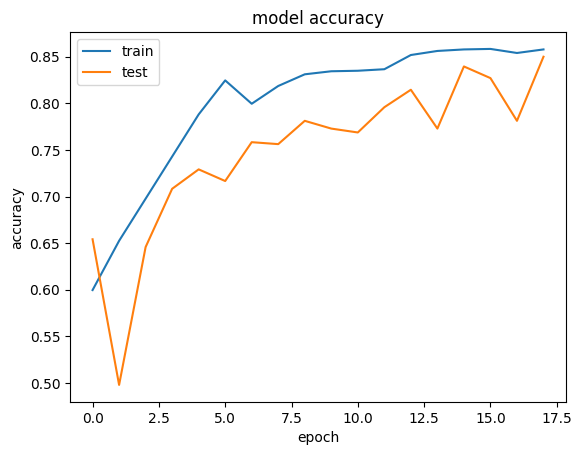

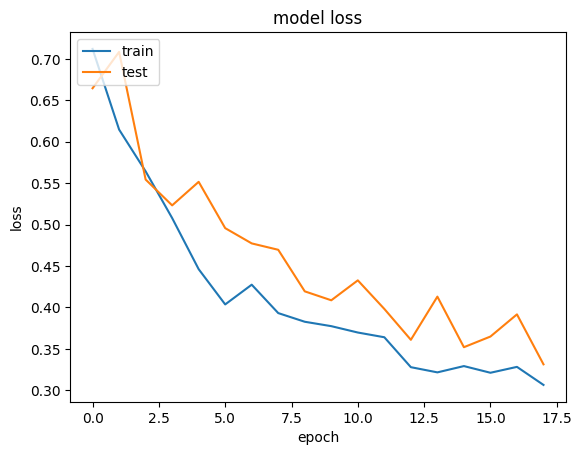

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving the model into the drive

In [27]:
model.save('/content/drive/MyDrive/Dataset_Traffic/M.h5')

Loading the saved model for prediction

In [28]:
best_model = load_model('/content/drive/MyDrive/Dataset_Traffic/M.h5')

In [32]:
best_model.metrics_names

['loss', 'accuracy']

Getting the accuracy and loss value of validation data

In [33]:
best_model.evaluate(validation_generator)

16/16 [==============================] - 29s 2s/step - loss: 0.3277 - accuracy: 0.8537


[0.3277166485786438, 0.8537074327468872]

# Accuracy of our model : 85.37%

Getting the accuracy and loss value of training data

In [34]:
best_model.evaluate(train_generator)

59/59 [==============================] - 116s 2s/step - loss: 0.3159 - accuracy: 0.8656


[0.3158997595310211, 0.8656316995620728]

In [58]:
loaded_img = image.load_img('/content/OIP.jpg',target_size=(224,224))

1/1 [==============================] - 0s 89ms/step
Ambulance detected


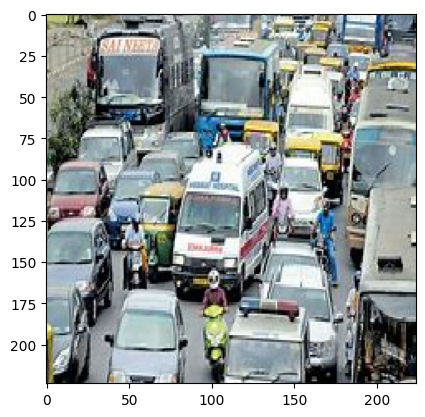

In [59]:
plt.imshow(loaded_img)
img = image.img_to_array(loaded_img)
new_img = np.expand_dims(img,axis=0)
ypred = best_model.predict(new_img)
if(ypred[0]==1):
  print("Ambulance detected")
else :
  print("NO Ambulance Detected")